# Linear Regression

>### [예제 5] Multi Variable Linear Regression(NumPy)

>### Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
#Input(AGE) and Labels(BP)
x_input = np.array([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= np.float32)
labels = np.array([[118],[125],[130],[118],[126],[123],[120],[124],[130],[122],[125],[130],[127],[130],[130],[125.5],[130],[138]], dtype= np.float32)

W = np.random.normal(size=(2, 1))
B = np.random.normal(size=())

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \end{bmatrix}$,  $W = \begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}$
>### $H(x_{1},x_{2}) = w_{1}x_{1} + w_{2}x_{2} + b = \begin{bmatrix}x_{1}&x_{2}\end{bmatrix}\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix} + b$
>### $H(x) = XW + b$

>### $H(X) = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \end{bmatrix}.\begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}+\begin{bmatrix} b \\ b \\ b\end{bmatrix} = \begin{bmatrix} x_{11}w_{1} + x_{12}w_{2} +b\\ x_{21}w_{1} + x_{22}w_{2}+b \\ x_{31}w_{1} + x_{32}w_{2}+b \end{bmatrix}$


In [3]:
# Hypothesis
def Hypothesis(X):
  return np.matmul(X, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $cost(W,b) = \sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [4]:
# Cost function
def Cost():
  return np.mean((Hypothesis(x_input) - labels)**2)

>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta \to 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [5]:
# Gradient
def Gradient():
    global W, B
    pres_W = W.copy()
    grad_W = np.zeros_like(W)
    delta = 5e-7

    for idx in range(W.size):
      W[idx,0] = pres_W[idx,0] + delta
      cost_p = Cost()
      W[idx,0] = pres_W[idx,0] - delta
      cost_m = Cost()
      grad_W[idx,0] = (cost_p-cost_m)/(2*delta)
      W[idx,0] = pres_W[idx,0]
        
    pres_b = B
    B = pres_b + delta
    cost_p = Cost()
    B = pres_b - delta
    cost_m = Cost()
    grad_B = (cost_p-cost_m)/(2*delta)
    B = pres_b

    return grad_W, grad_B

>### 학습 준비 과정

>### Training
>### $\mu$ : Learning rate
>### $W = W - \mu\frac{\partial}{\partial W}cost(W, b)$
>### $b = b - \mu\frac{\partial}{\partial b}cost(W, b)$

In [6]:
%%time

# Parameter Set
epochs = 1000000
learning_rate = 0.0001

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

# 학습 (Training)
for cnt in range(0, epochs+1):
    cost_graph[cnt] = Cost()
    if cnt % (epochs/20) == 0:
        print("[{:>7}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}]], B = {:>7.4}".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B))
        
    grad_W, grad_B = Gradient()
    W -= learning_rate * grad_W
    B -= learning_rate* grad_B

[      0] cost =   1.27e+04, W = [[-0.3355] [  1.229]], B =  -1.479
[  50000] cost =      93.61, W = [[ 0.3585] [  3.728]], B =   10.37
[ 100000] cost =      72.54, W = [[ 0.3333] [  3.387]], B =   20.62
[ 150000] cost =       56.5, W = [[ 0.3113] [   3.09]], B =   29.56
[ 200000] cost =      44.28, W = [[ 0.2922] [   2.83]], B =   37.37
[ 250000] cost =      34.98, W = [[ 0.2754] [  2.604]], B =   44.18
[ 300000] cost =      27.89, W = [[ 0.2608] [  2.406]], B =   50.12
[ 350000] cost =      22.49, W = [[ 0.2481] [  2.234]], B =   55.31
[ 400000] cost =      18.38, W = [[  0.237] [  2.083]], B =   59.84
[ 450000] cost =      15.26, W = [[ 0.2273] [  1.952]], B =   63.79
[ 500000] cost =      12.87, W = [[ 0.2188] [  1.837]], B =   67.23
[ 550000] cost =      11.06, W = [[ 0.2114] [  1.737]], B =   70.24
[ 600000] cost =      9.677, W = [[  0.205] [   1.65]], B =   72.87
[ 650000] cost =      8.625, W = [[ 0.1994] [  1.574]], B =   75.16
[ 700000] cost =      7.823, W = [[ 0.1945] [  1

>### Hypothesis Test 

In [7]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => BP : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

x_test = [[50, 25.0]]
H_x = Hypothesis(x_test)
print("\n[ Prediction by specific data ]")
print("Age : {}, BMI : {:>7.4} = > BP : {:>7.4}".format(x_test[0][0],x_test[0][1], H_x[0][0]))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => BP :   116.8 [label => [118.]]
Age : 25.0, BMI :    26.0 => BP :   121.8 [label => [125.]]
Age : 25.0, BMI :    30.0 => BP :   126.8 [label => [130.]]
Age : 35.0, BMI :    22.0 => BP :   118.5 [label => [118.]]
Age : 35.0, BMI :    26.0 => BP :   123.5 [label => [126.]]
Age : 35.0, BMI :    30.0 => BP :   128.5 [label => [123.]]
Age : 45.0, BMI :    22.0 => BP :   120.3 [label => [120.]]
Age : 45.0, BMI :    26.0 => BP :   125.3 [label => [124.]]
Age : 45.0, BMI :    30.0 => BP :   130.3 [label => [130.]]
Age : 55.0, BMI :    22.0 => BP :   122.0 [label => [122.]]
Age : 55.0, BMI :    26.0 => BP :   127.0 [label => [125.]]
Age : 55.0, BMI :    30.0 => BP :   132.1 [label => [130.]]
Age : 65.0, BMI :    22.0 => BP :   123.8 [label => [127.]]
Age : 65.0, BMI :    26.0 => BP :   128.8 [label => [130.]]
Age : 65.0, BMI :    30.0 => BP :   133.8 [label => [130.]]
Age : 73.0, BMI :    22.0 => BP :   125.2 [label => [125.5]]
Age : 73.0, BMI :  

>### Plotting

<function matplotlib.pyplot.show>

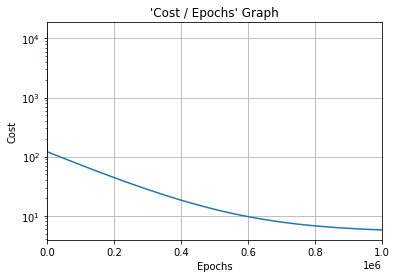

In [8]:
# Training 상황에 대한 그래프 출력
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show